**Mounting Drive**

This line imports the drive module from the google.colab package. The drive module provides functions for interacting with Google Drive from within a Colab notebook.

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


The imutils library is a set of convenience functions for common computer vision and image processing tasks in OpenCV.
It provides a convenient set of tools to streamline various aspects of working with images and video frames.


 **Installing required libraries**

In [ ]:
pip install imutils

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/107.7 GB disk)


**Install YOLOv8**

YOLO, short for "You Only Look Once," is a popular real-time object detection system in computer vision. It's an algorithm that can detect and locate multiple objects in an image or a video frame, providing both the class labels and the bounding box coordinates for the detected objects.

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


Testing the YOLO Model with an online image.

In [ ]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.23M/6.23M [00:00<00:00, 76.8MB/s]

2023-11-07 10:58:38.993905: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 10:58:38.993973: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 10:58:38.994010: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 10:58:39.003299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-

In [ ]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [ ]:
!ls

data.yaml  test  train	val


**Custom Training YOLO Model**

In [ ]:
%cd /content/drive/MyDrive/dataset
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/dataset
100% 21.5M/21.5M [00:00<00:00, 114MB/s] 

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, d

In [ ]:
!ls '/content/drive/MyDrive/dataset/runs/detect/train'

args.yaml					    R_curve.png        train_batch17.jpg
confusion_matrix.png				    results.csv        train_batch1.jpg
events.out.tfevents.1699354995.275409c4092c.2096.0  results.png        train_batch2.jpg
F1_curve.png					    train_batch0.jpg   val_batch0_labels.jpg
P_curve.png					    train_batch15.jpg  val_batch0_pred.jpg
PR_curve.png					    train_batch16.jpg  weights


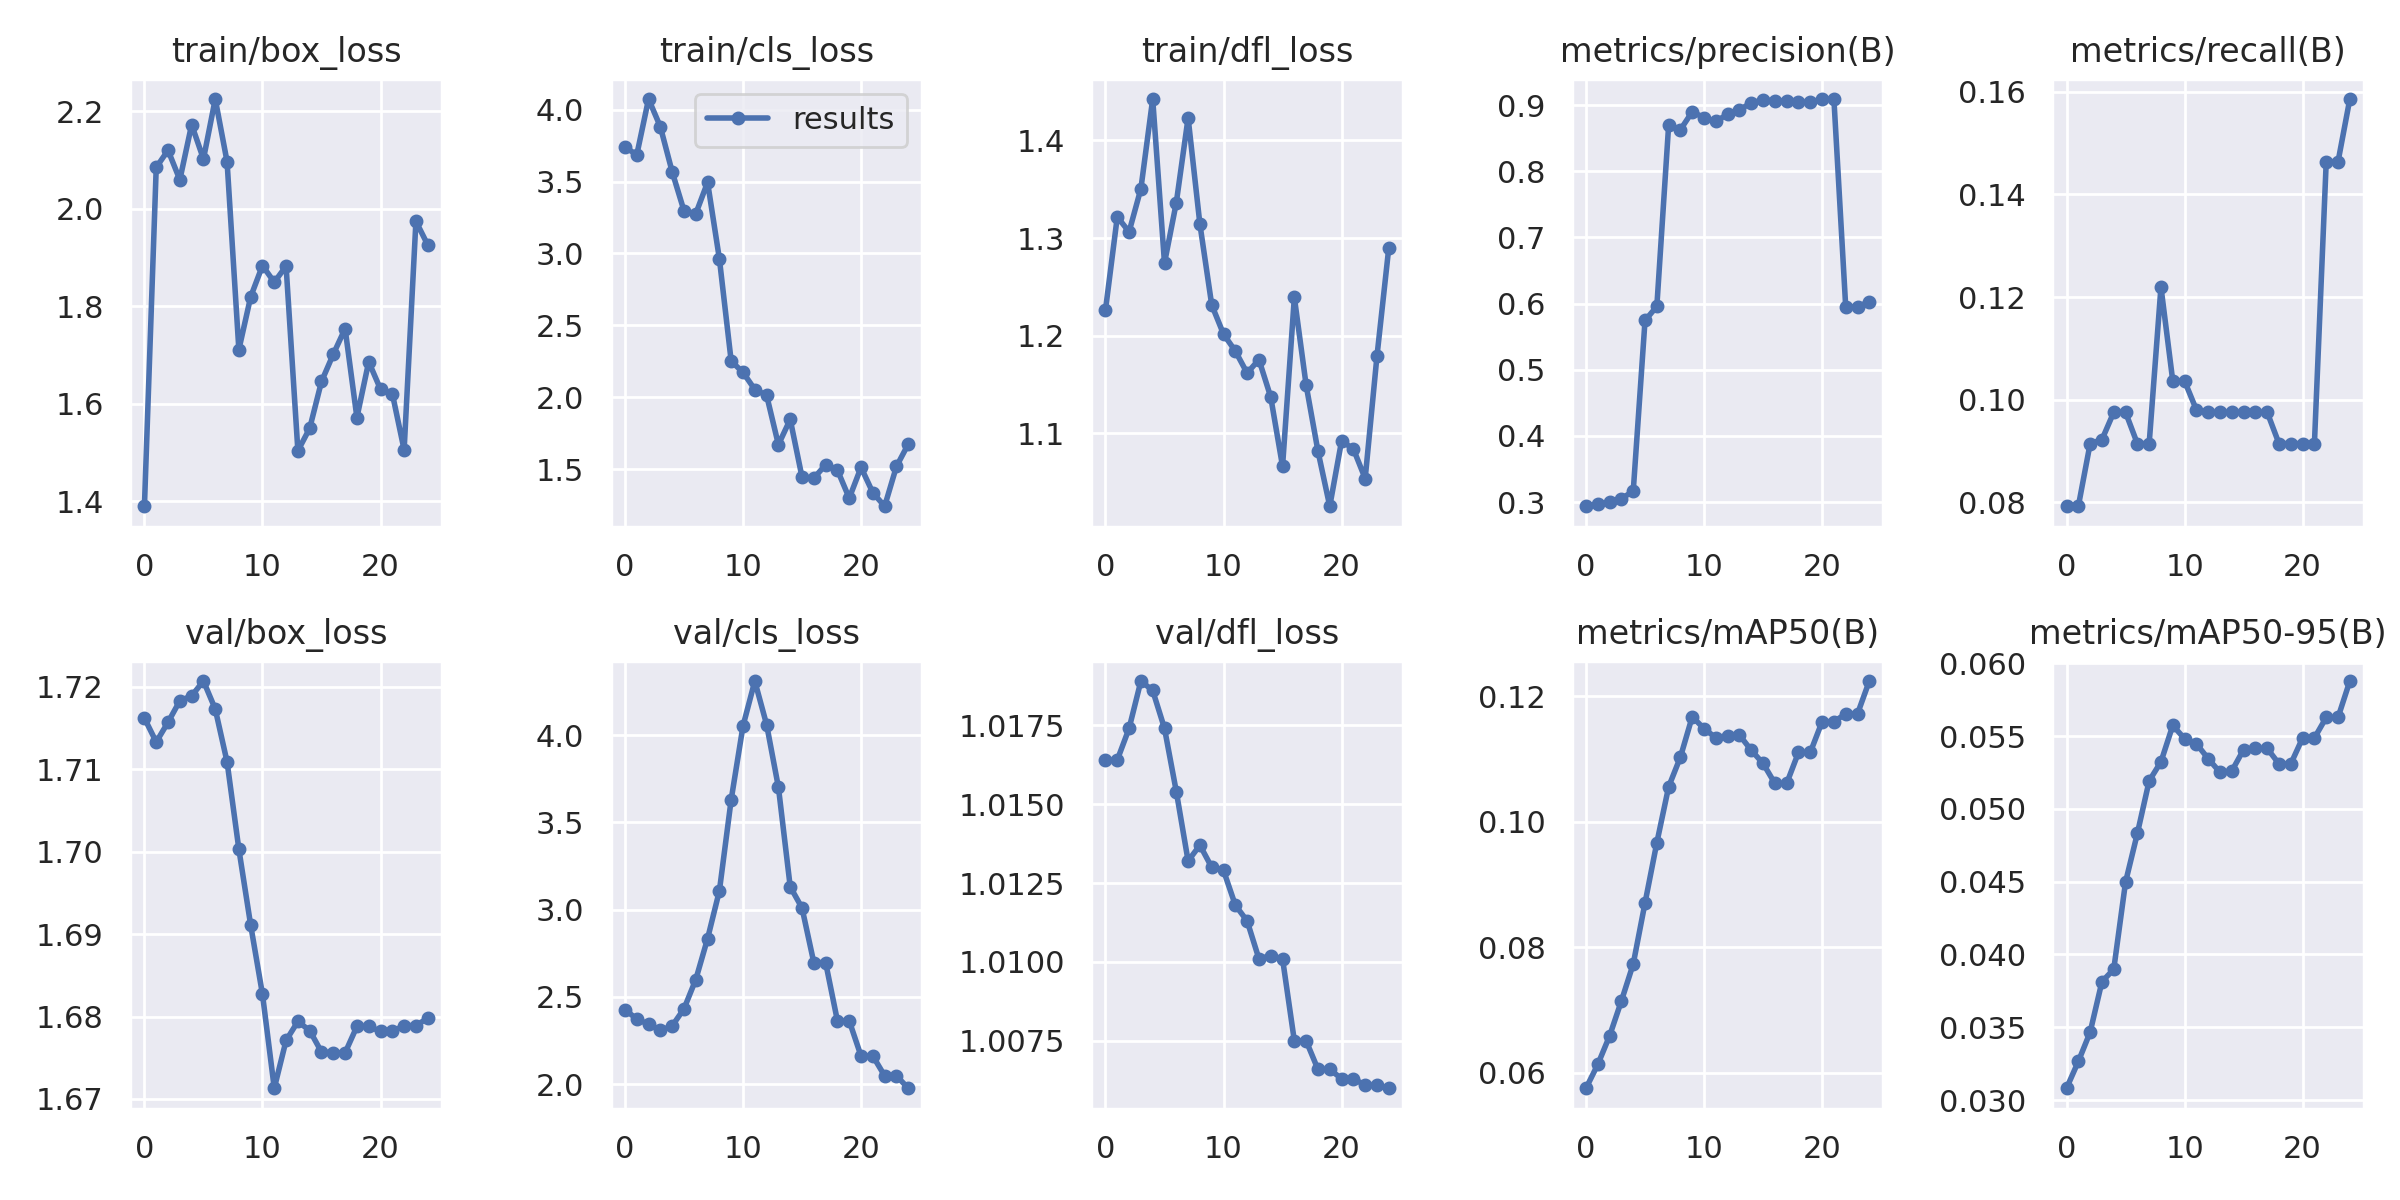

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

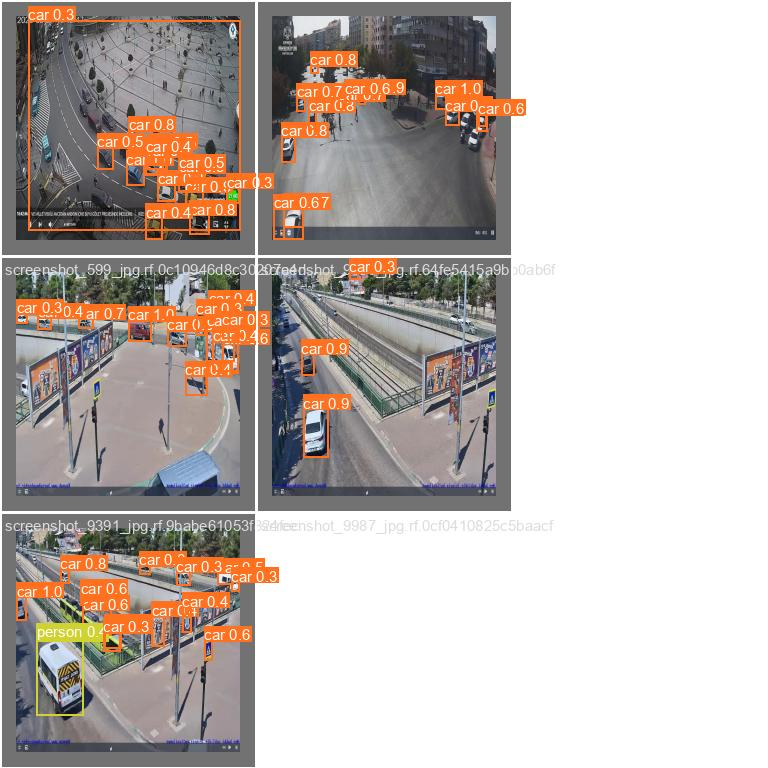

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

**Validating Custom Model**

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2023-11-07 11:08:43.627411: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 11:08:43.627503: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 11:08:43.627565: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 11:08:43.649374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 11:08:45.239036: W tensorflow/compiler/

**Inference with Custom Model**

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source="/content/drive/MyDrive/dataset/test/images"

2023-11-07 11:09:36.954955: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 11:09:36.955030: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 11:09:36.955068: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 11:09:36.965216: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 11:09:38.447900: W tensorflow/compiler/

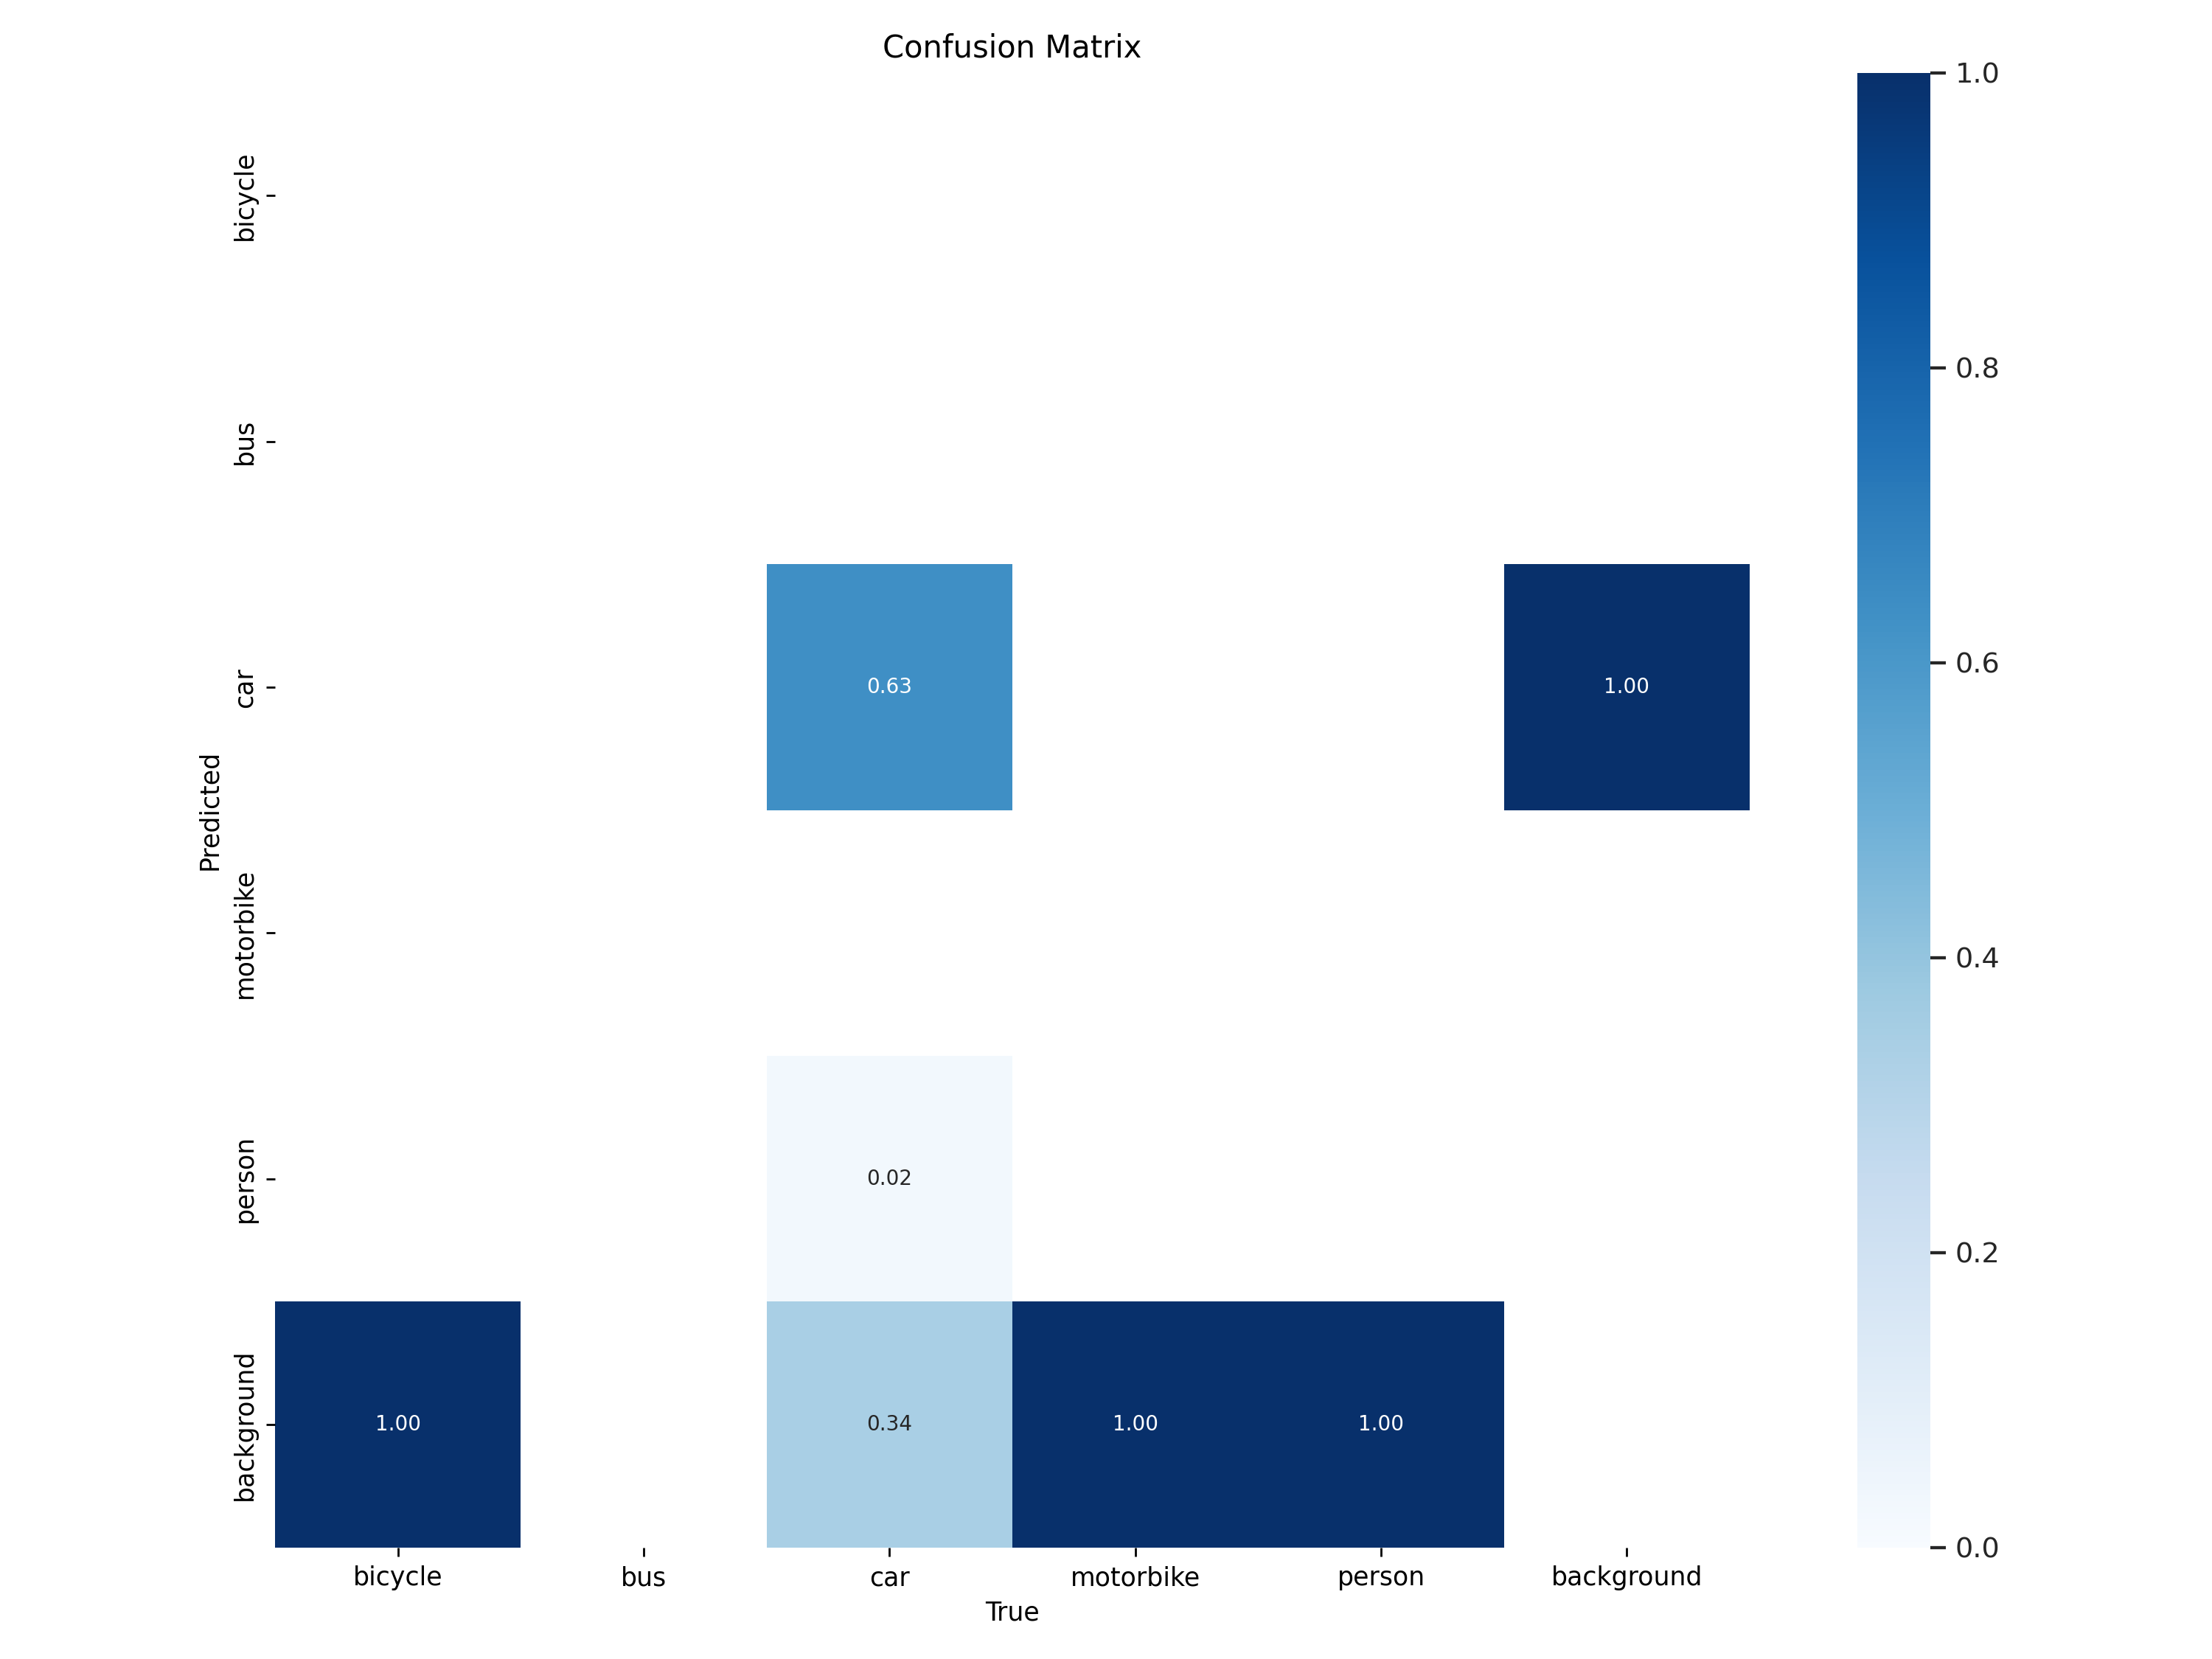

In [ ]:
Image(filename='/content/drive/MyDrive/dataset/runs/detect/val/confusion_matrix.png', width=600)

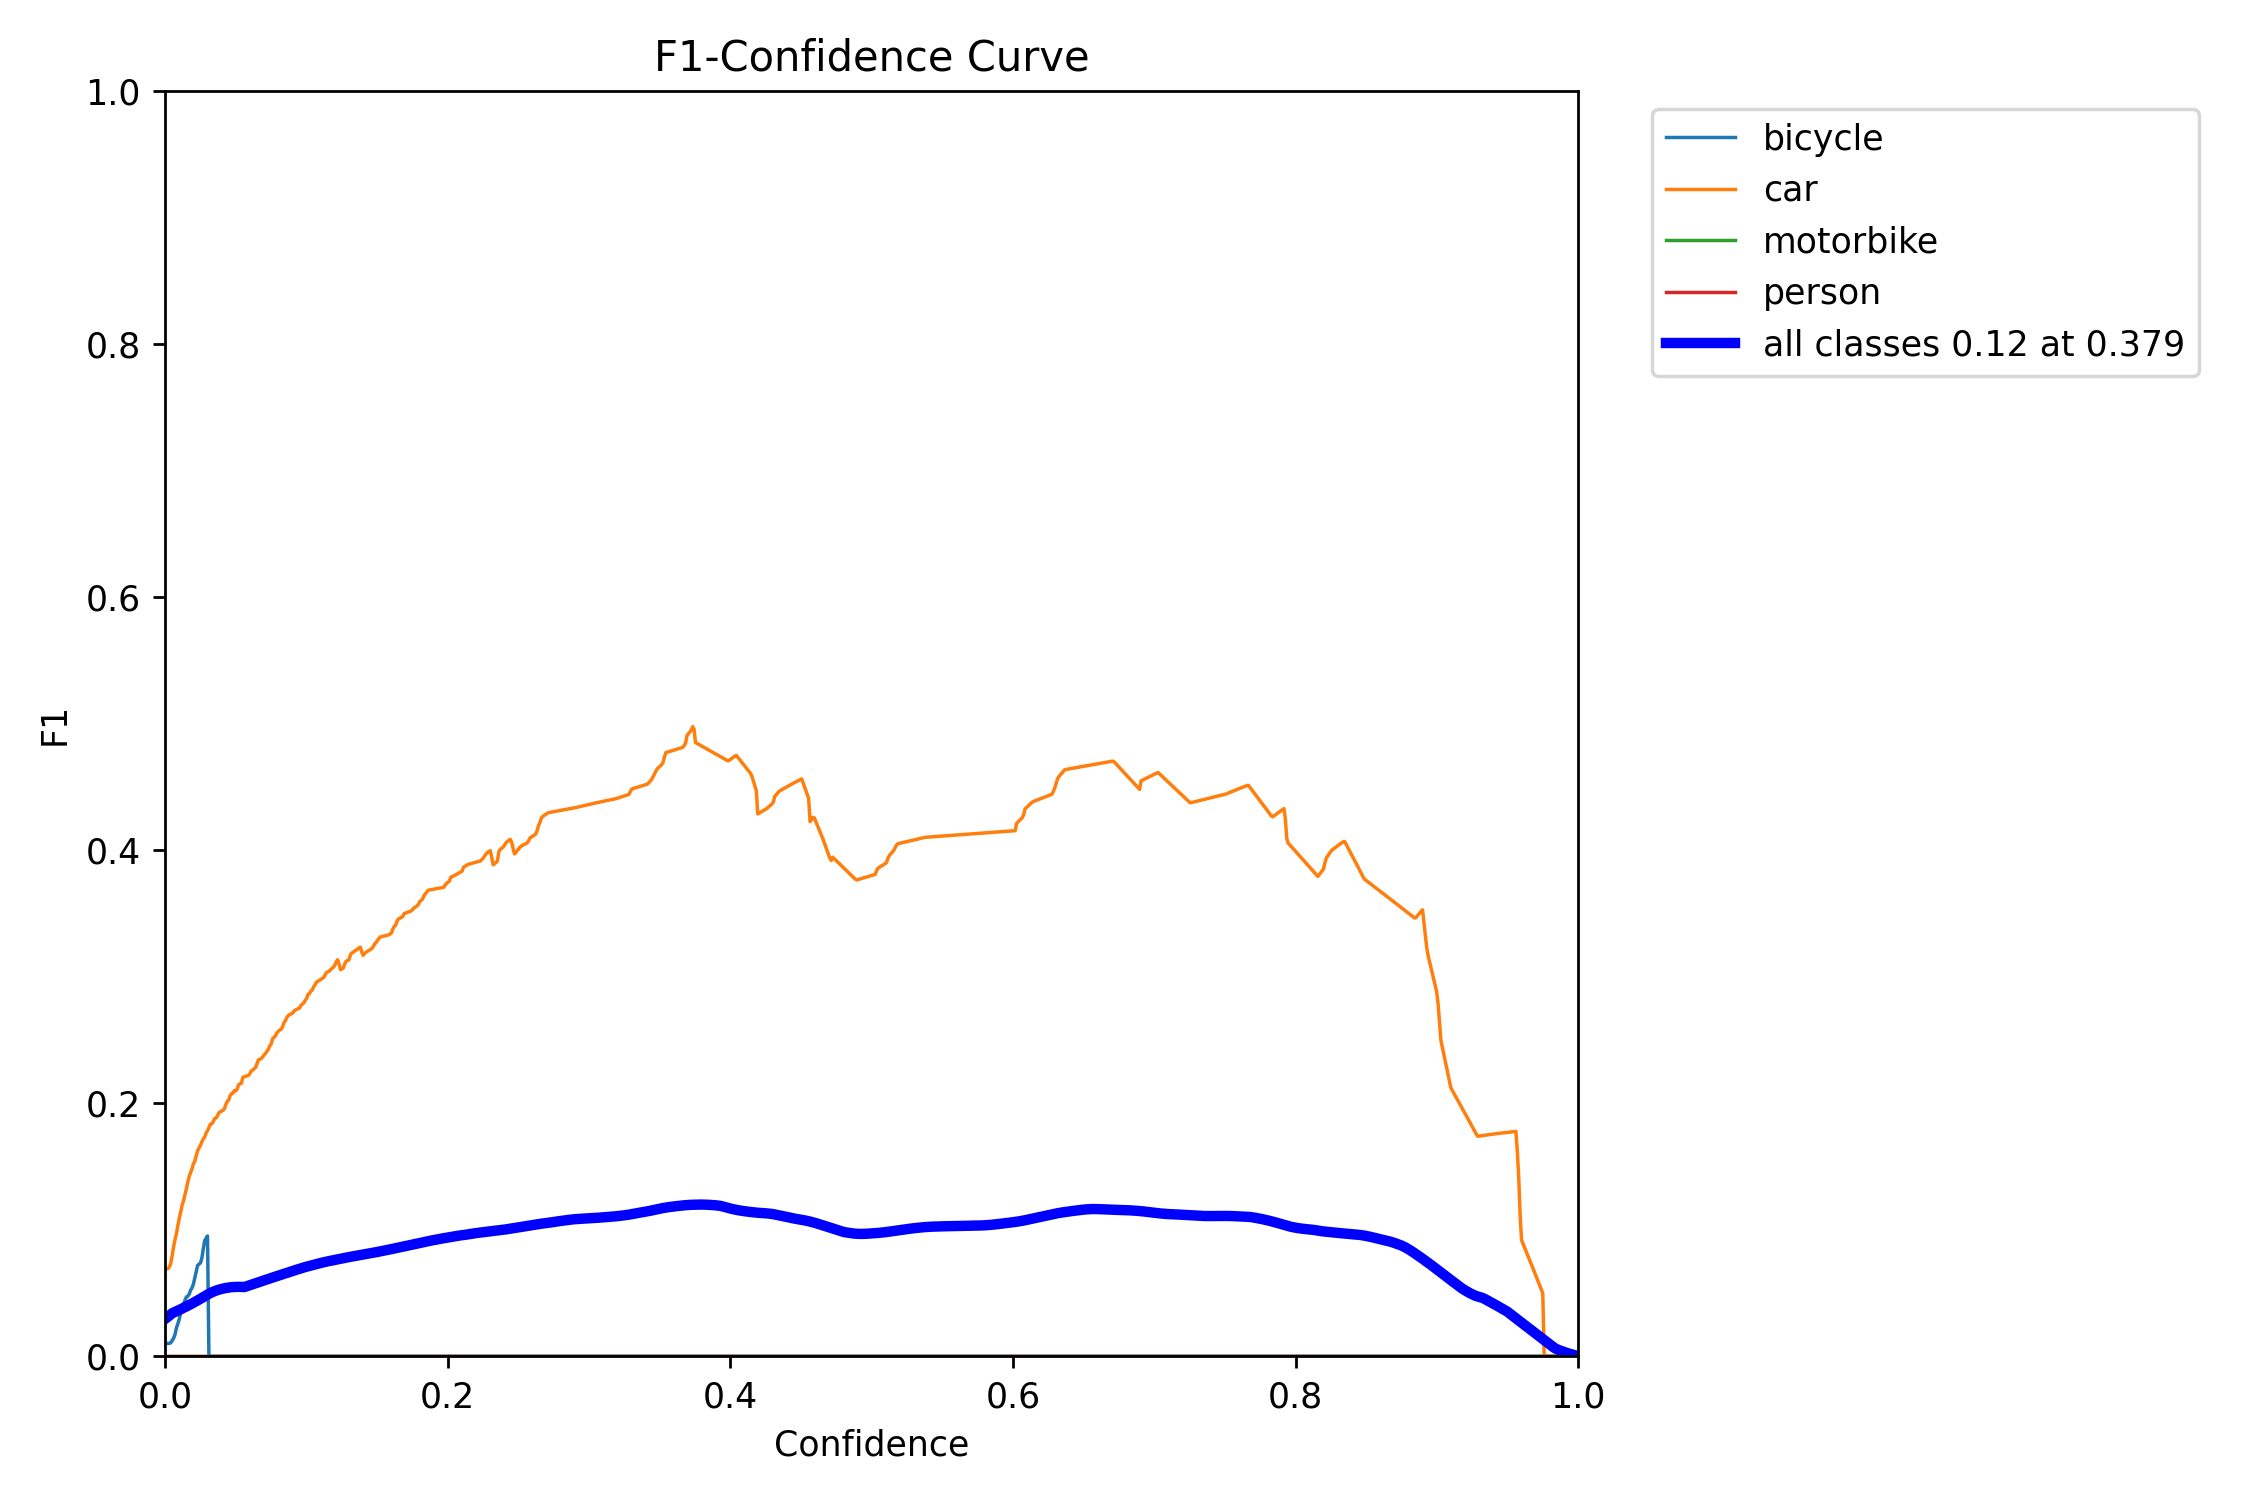

In [ ]:
Image(filename="/content/drive/MyDrive/dataset/runs/detect/val/F1_curve.png",width=600)

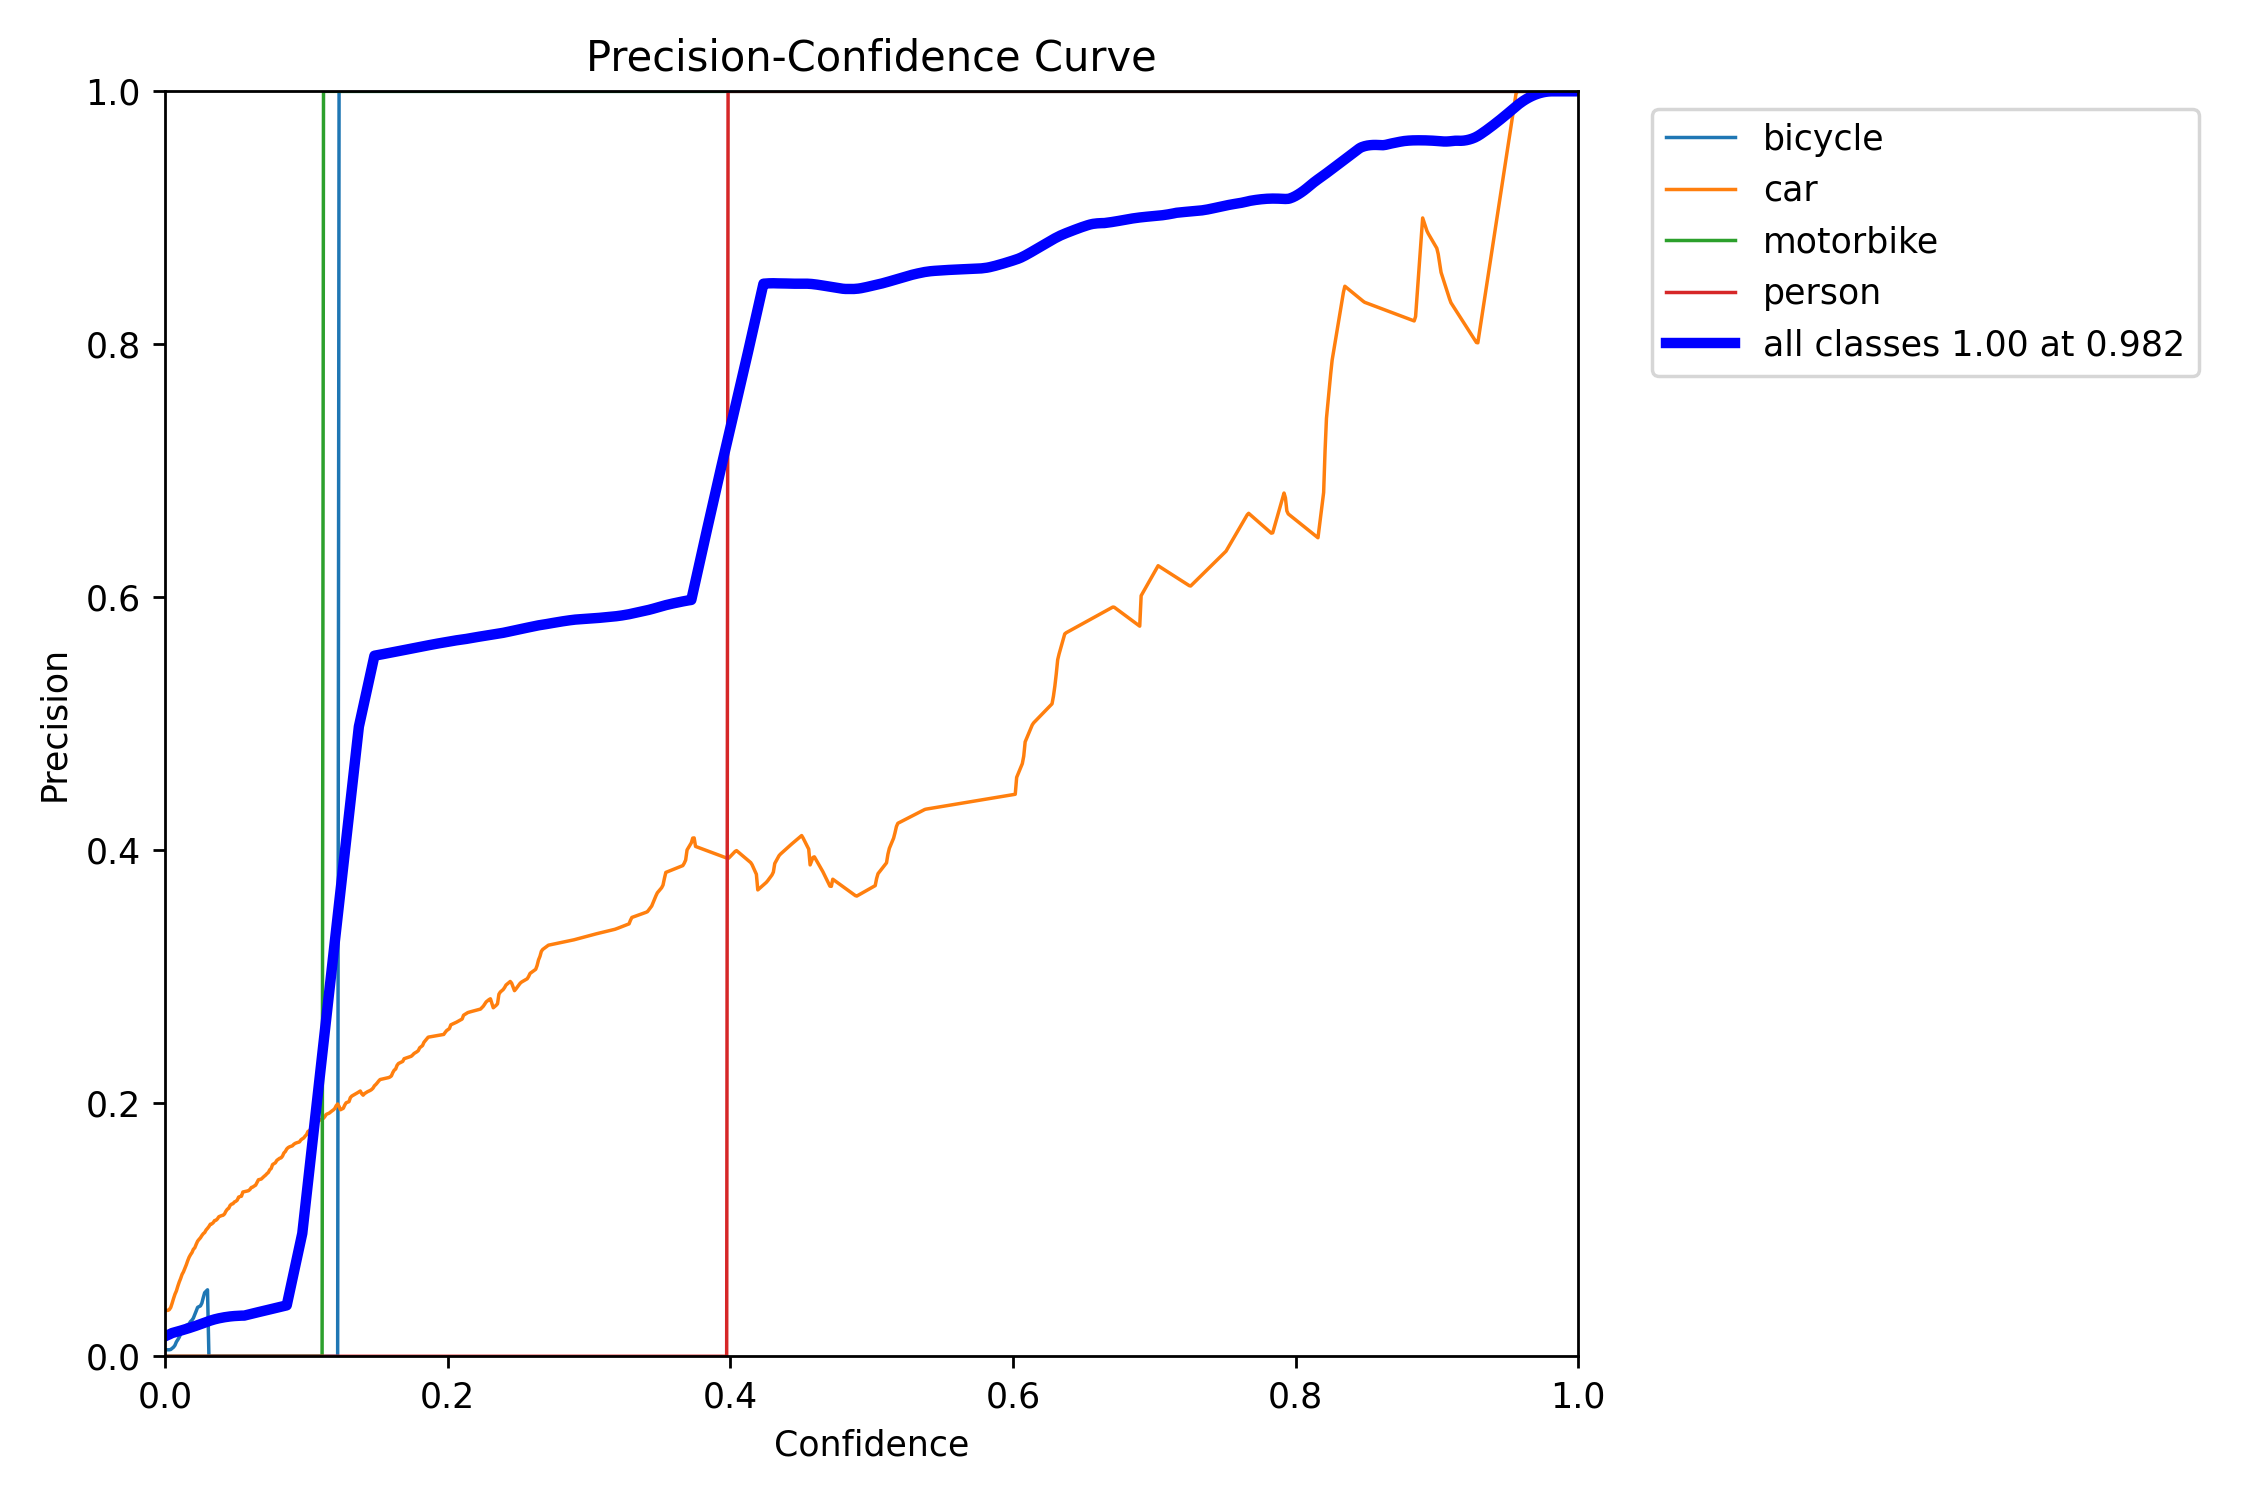

In [ ]:
Image(filename="/content/drive/MyDrive/dataset/runs/detect/val/P_curve.png",width=600)

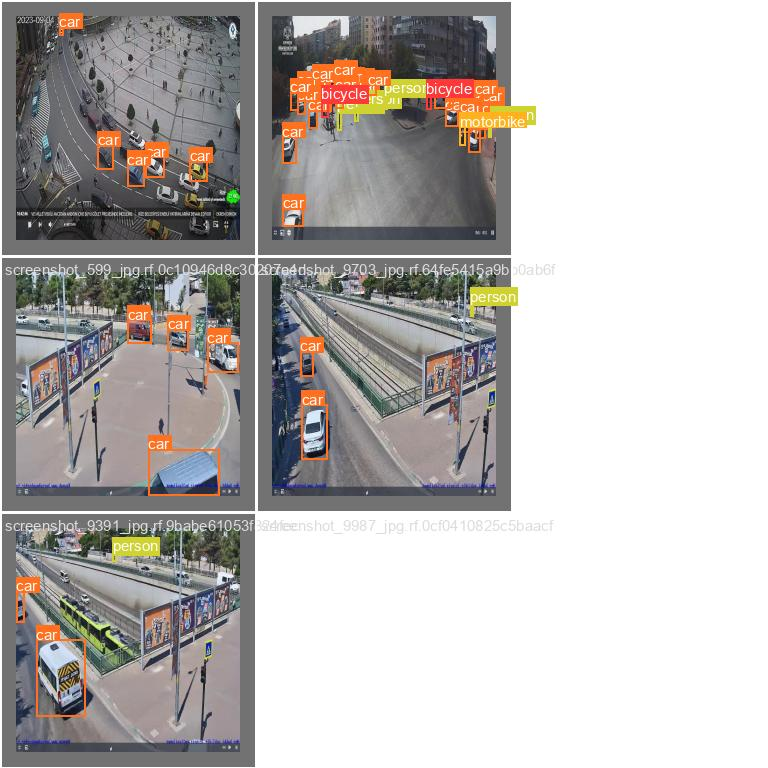

In [ ]:
Image(filename='/content/drive/MyDrive/dataset/runs/detect/val/val_batch0_labels.jpg', width=600)